In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [97]:
df = pd.read_csv('Loan.csv')

Missing values analysis

In [98]:
df.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


There are no missing values present in our dataset

**Summary**

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

The datatypes are correctly type casted.

In [100]:
df['LoanApproved'] = df['LoanApproved'].map({1: 'Approved', 0: 'Not Approved'})

**Correlation Matrix**

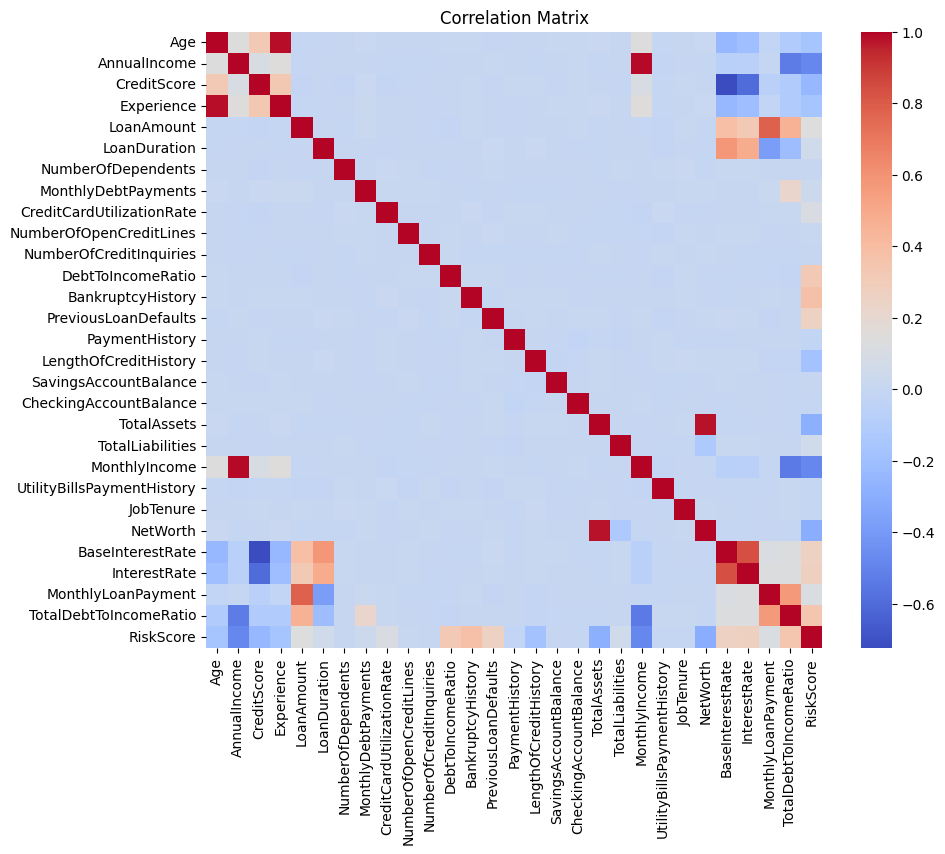

In [101]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

**Data Distribution**

<Axes: ylabel='count'>

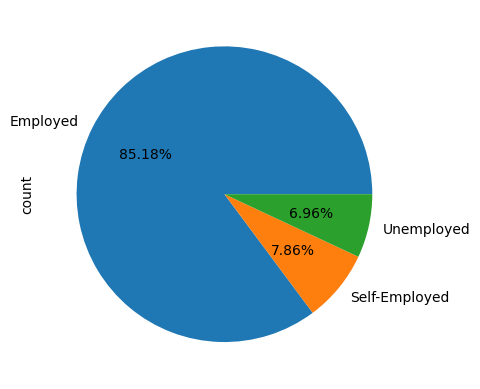

In [102]:
df['EmploymentStatus'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

<Axes: ylabel='count'>

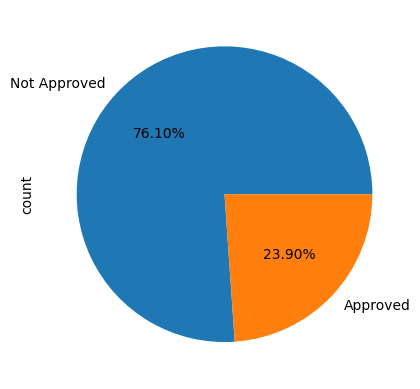

In [103]:
df['LoanApproved'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

<Axes: ylabel='count'>

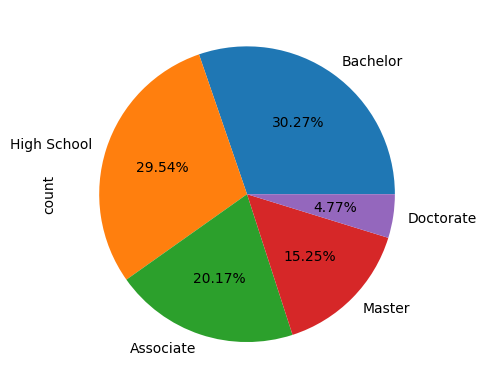

In [104]:
df['EducationLevel'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

<Axes: ylabel='count'>

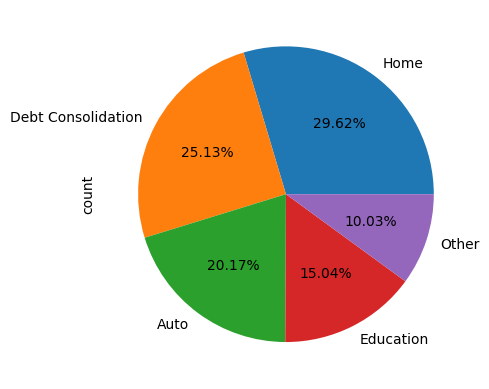

In [105]:
df['LoanPurpose'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

INSIGHTS

1. Age vs Loan Amount

Applicants between the ages of 30-45 tend to request higher loan amounts, with approval rates higher in this age group compared to younger or older groups.

The middle-aged demographic often represents financially stable individuals, which lenders may favor.

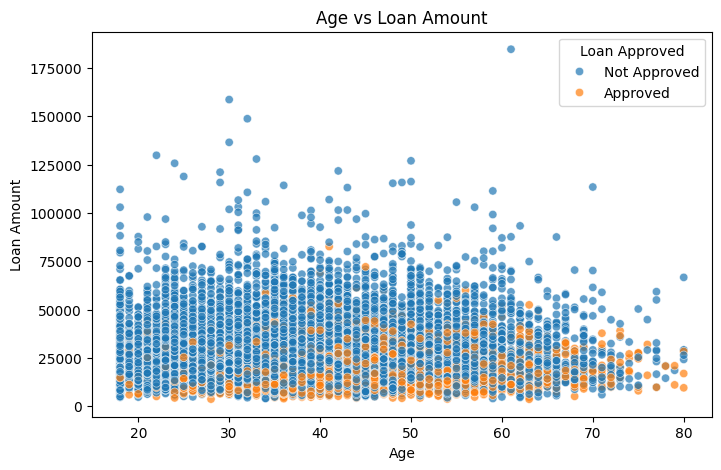

In [106]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='LoanAmount', hue='LoanApproved', alpha=0.7)
plt.title('Age vs Loan Amount')
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Approved')
plt.show()

2. Annual Income Distribution by Education

Graduates tend to have higher incomes, and their loan approval rates are higher across income brackets.
Education positively impacts earning potential and eligibility for loans.

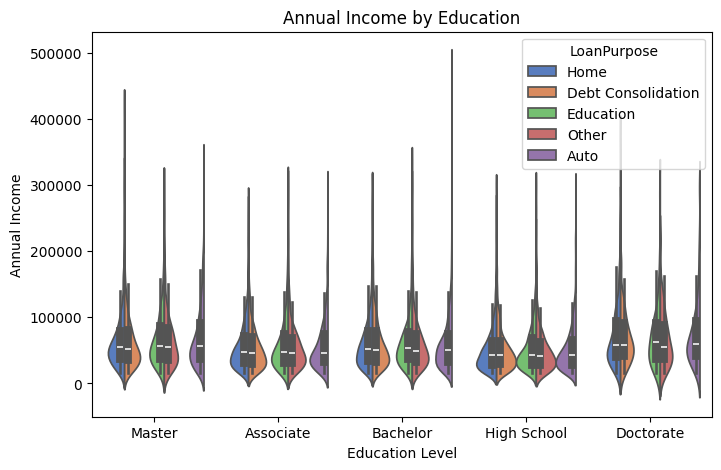

In [107]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='EducationLevel', y='AnnualIncome', palette='muted', split=True, hue='LoanPurpose')
plt.title('Annual Income by Education')
plt.xlabel('Education Level')
plt.ylabel('Annual Income')
plt.show()

3. Annual Income vs Credit Score

Applicants with higher annual incomes generally have better credit scores, leading to higher loan approval rates.
High income and a good credit score reduce the risk for lenders, increasing approval chances.

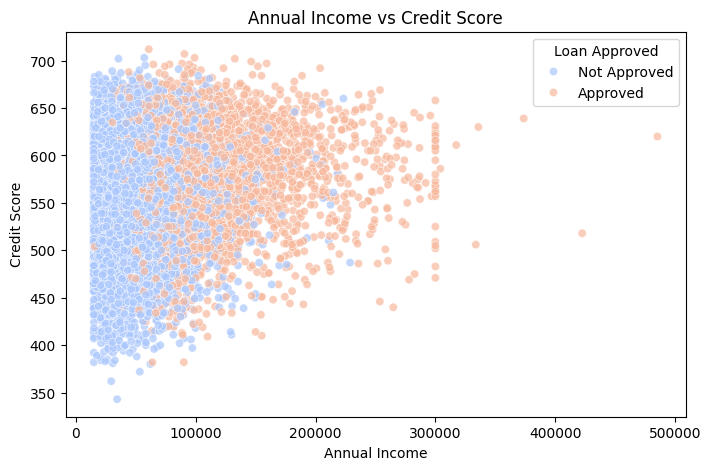

In [108]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='AnnualIncome', y='CreditScore', hue='LoanApproved', alpha=0.7, palette='coolwarm')
plt.title('Annual Income vs Credit Score')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.legend(title='Loan Approved')
plt.show()

4. Employment Status vs Loan Approval

Full-time employees have significantly higher loan approval rates compared to part-time, unemployed, or self-employed individuals.
Lenders prioritize steady income from full-time employment when approving loans.

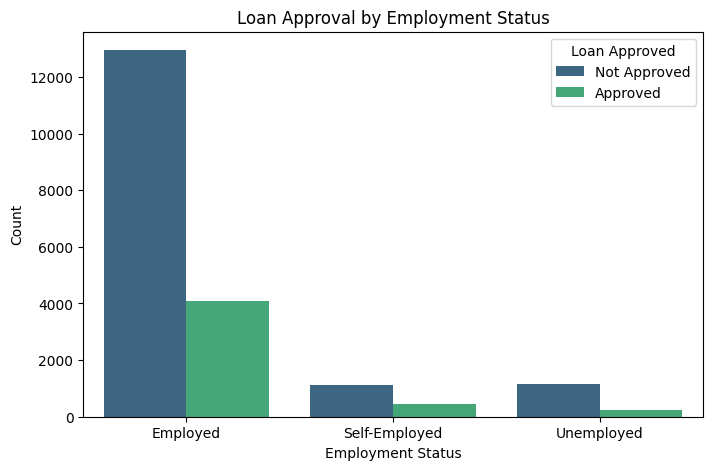

In [109]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='EmploymentStatus', hue='LoanApproved', palette='viridis')
plt.title('Loan Approval by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Loan Approved')
plt.show()

5. Credit Score vs Risk Score

Higher credit scores correlate with lower risk scores, resulting in more loan approvals.
Credit score is a key indicator for assessing financial risk and eligibility for loans.

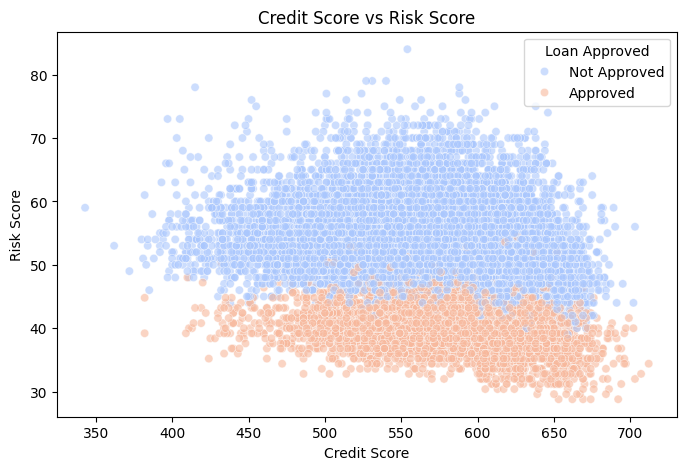

In [110]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='CreditScore', y='RiskScore', alpha=0.6, hue='LoanApproved', palette='coolwarm')
plt.title('Credit Score vs Risk Score')
plt.xlabel('Credit Score')
plt.ylabel('Risk Score')
plt.legend(title='Loan Approved')
plt.show()

6. Marital Status vs Loan Amount

Married applicants tend to apply for higher loan amounts and have higher approval rates compared to single applicants.
Marriage might signal financial stability or dual-income households, increasing loan eligibility.

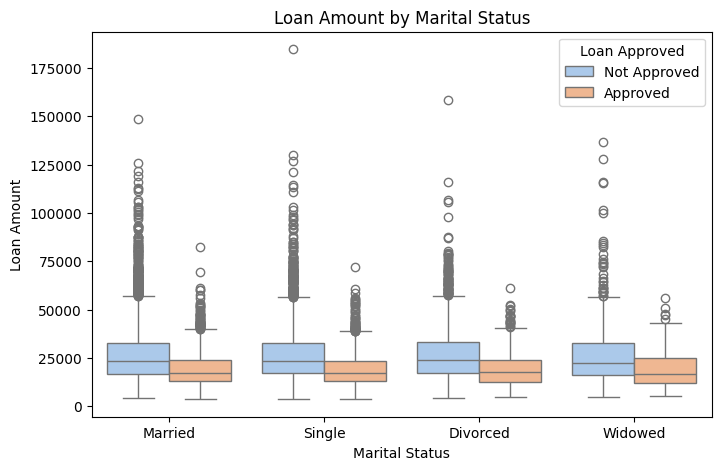

In [111]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='MaritalStatus', y='LoanAmount', hue='LoanApproved', palette='pastel')
plt.title('Loan Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Approved')
plt.show()

7. Loan Purpose vs Loan Amount

Home purchases and business investments generally involve higher loan amounts compared to personal or vehicle loans.
Loan purposes like home or business investments require larger capital, reflecting borrower needs.

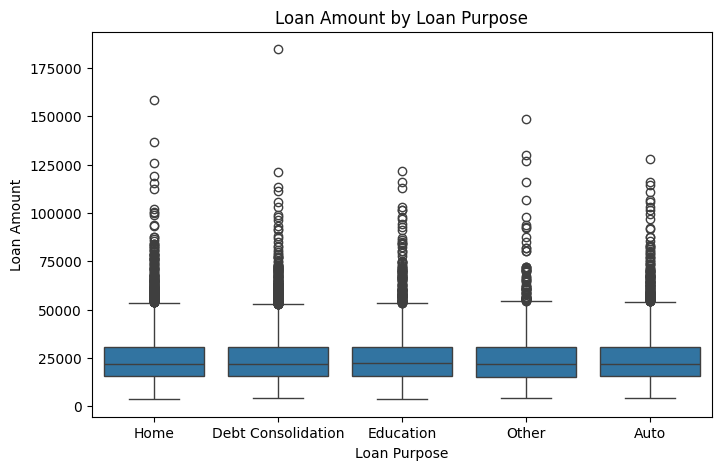

In [112]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='LoanPurpose', y='LoanAmount')
plt.title('Loan Amount by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Amount')
plt.show()

8. Savings Account Balance vs Loan Approval

Approved applicants typically have higher savings account balances compared to rejected ones.
Higher savings balances reduce perceived financial risk, increasing approval likelihood.

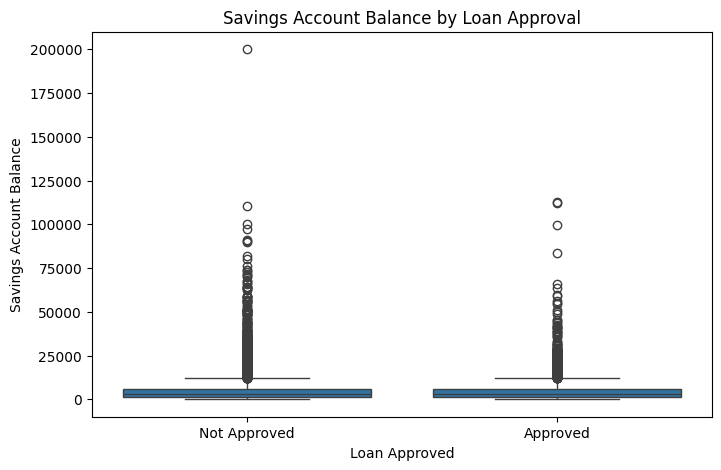

In [113]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='LoanApproved', y='SavingsAccountBalance')
plt.title('Savings Account Balance by Loan Approval')
plt.xlabel('Loan Approved')
plt.ylabel('Savings Account Balance')
plt.show()

9. Annual Income vs Loan Amount

Higher annual income correlates with larger loan amounts. Applicants with advanced education levels often apply for higher loans.
Income and education level are both strong indicators of loan eligibility and borrowing capacity.

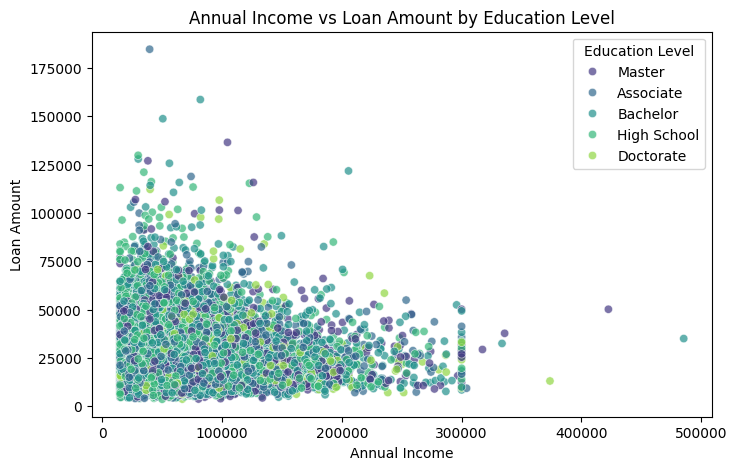

In [114]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='AnnualIncome', y='LoanAmount', hue='EducationLevel', alpha=0.7, palette='viridis')
plt.title('Annual Income vs Loan Amount by Education Level')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(title='Education Level')
plt.show()

10. Debt-to-Income Ratio vs Credit Score

Applicants with lower debt-to-income ratios typically maintain higher credit scores, regardless of home ownership status.
Lower debt burdens are often associated with better financial discipline and creditworthiness.

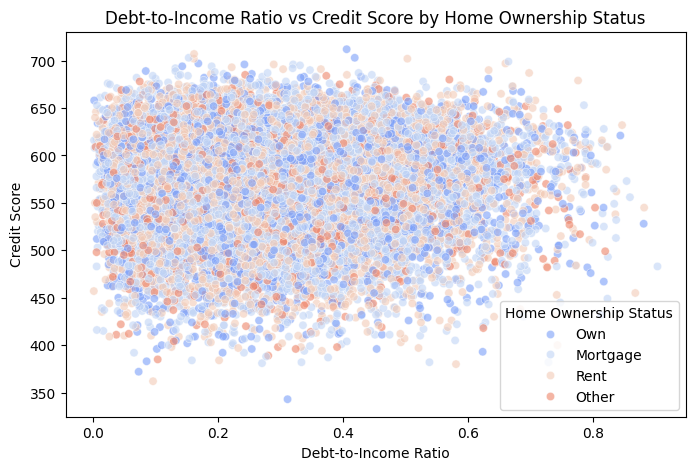

In [115]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='DebtToIncomeRatio', y='CreditScore', hue='HomeOwnershipStatus', palette='coolwarm', alpha=0.6)
plt.title('Debt-to-Income Ratio vs Credit Score by Home Ownership Status')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Credit Score')
plt.legend(title='Home Ownership Status')
plt.show()

11. Monthly Income vs Loan Amount

Married applicants with higher monthly incomes tend to apply for and receive larger loan amounts compared to unmarried individuals.
Married applicants might have dual incomes, enabling them to handle larger loan obligations.

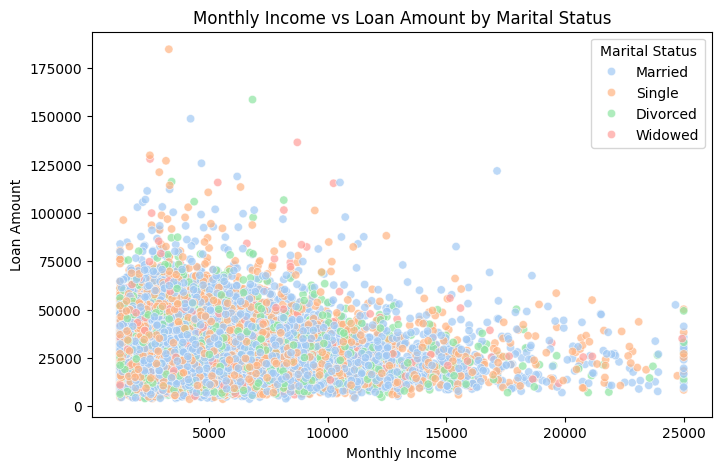

In [116]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='MonthlyIncome', y='LoanAmount', hue='MaritalStatus', alpha=0.7, palette='pastel')
plt.title('Monthly Income vs Loan Amount by Marital Status')
plt.xlabel('Monthly Income')
plt.ylabel('Loan Amount')
plt.legend(title='Marital Status')
plt.show()

12. Credit Card Utilization Rate vs Credit Score

Lower credit card utilization rates are strongly associated with higher credit scores across all education levels.
Maintaining low credit card utilization demonstrates responsible credit usage, improving credit scores.

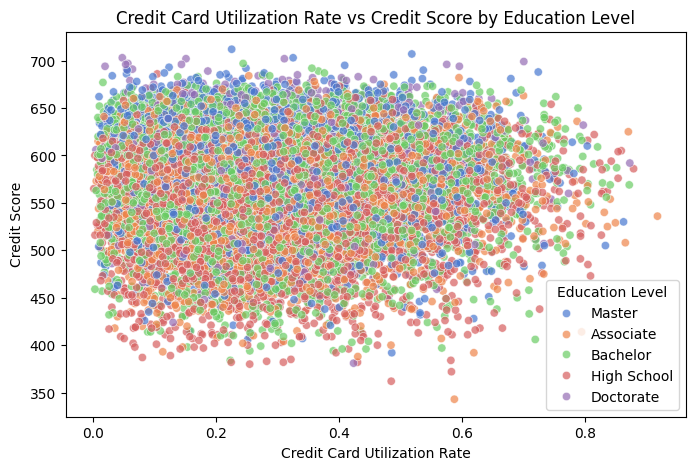

In [117]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='CreditCardUtilizationRate', y='CreditScore', alpha=0.7, hue='EducationLevel', palette='muted')
plt.title('Credit Card Utilization Rate vs Credit Score by Education Level')
plt.xlabel('Credit Card Utilization Rate')
plt.ylabel('Credit Score')
plt.legend(title='Education Level')
plt.show()

13. Bankruptcy History vs Net Worth

Applicants with no history of bankruptcy generally have a higher net worth compared to those who have declared bankruptcy.
Bankruptcy negatively impacts wealth accumulation, which can influence future credit decisions.

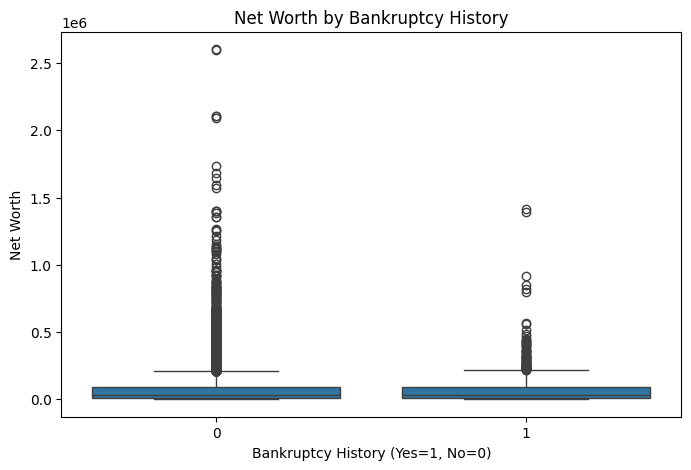

In [118]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='BankruptcyHistory', y='NetWorth')
plt.title('Net Worth by Bankruptcy History')
plt.xlabel('Bankruptcy History (Yes=1, No=0)')
plt.ylabel('Net Worth')
plt.show()

14. Risk Score vs Credit Score

There’s a strong negative correlation (-0.75) between RiskScore and CreditScore, indicating that higher credit scores reduce financial risk.
This relationship highlights how maintaining a good credit score minimizes perceived financial risks for lenders.

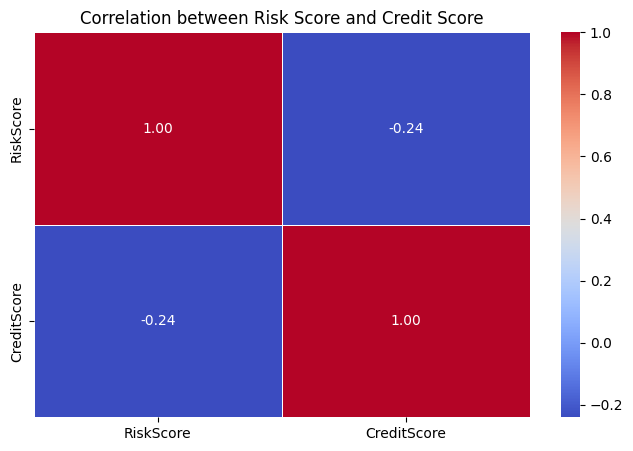

In [119]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['RiskScore', 'CreditScore']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Risk Score and Credit Score')
plt.show()

15. Average Loan Amount by Marital Status and Employment Status

Married applicants generally apply for higher loan amounts across all employment statuses.
Full-time employees, regardless of marital status, request higher loan amounts than part-time or unemployed applicants.
This demonstrates how marital and employment statuses jointly influence the financial needs and borrowing behavior.

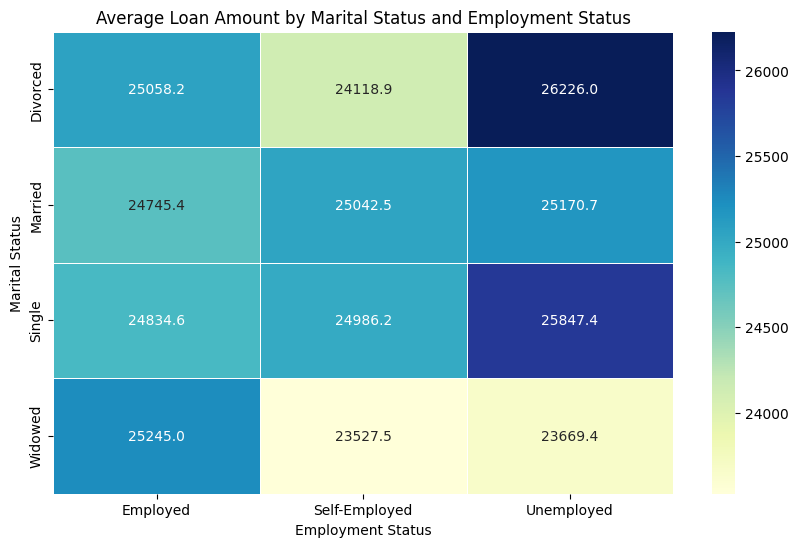

In [120]:
loan_avg = df.pivot_table(values='LoanAmount', index='MaritalStatus', columns='EmploymentStatus', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(loan_avg, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title('Average Loan Amount by Marital Status and Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Marital Status')
plt.show()

16. Employment Status and Homeownership Status with Risk Scoring

Text(95.72222222222221, 0.5, 'Employment Status')

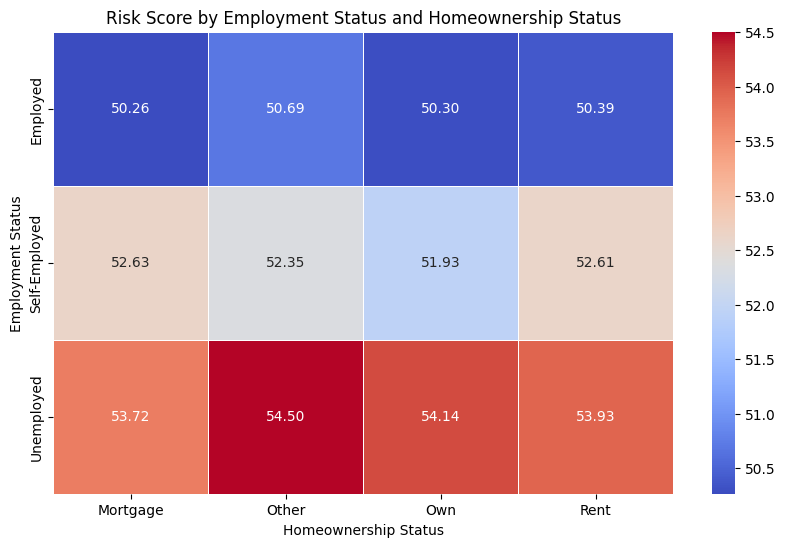

In [121]:
plt.figure(figsize=(10, 6))
pivot_table = df.pivot_table(index='EmploymentStatus', columns='HomeOwnershipStatus', values='RiskScore', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Risk Score by Employment Status and Homeownership Status')
plt.xlabel('Homeownership Status')
plt.ylabel('Employment Status')

17. Employment Status and Homeownership Status with Annual Income

Text(95.72222222222221, 0.5, 'Employment Status')

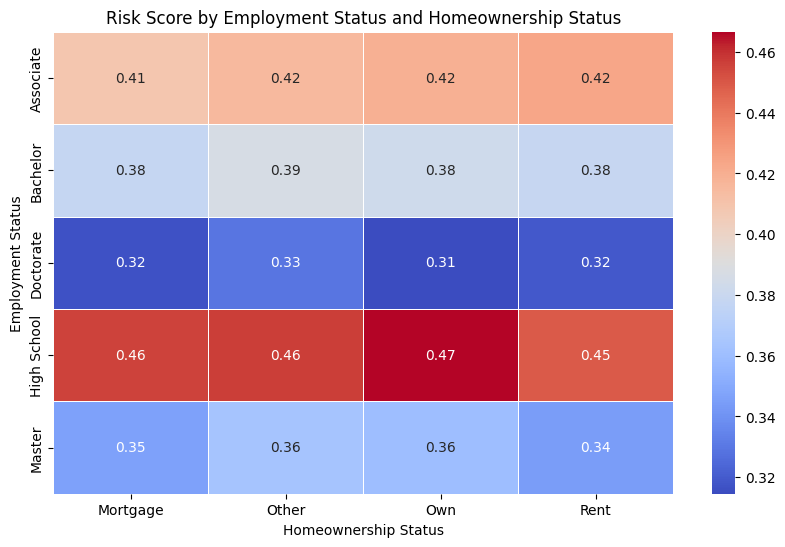

In [122]:
plt.figure(figsize=(10, 6))
pivot_table = df.pivot_table(index='EducationLevel', columns='HomeOwnershipStatus', values='TotalDebtToIncomeRatio', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Risk Score by Employment Status and Homeownership Status')
plt.xlabel('Homeownership Status')
plt.ylabel('Employment Status')

18. Net Worth vs Risk Score

Text(0.5, 1.0, 'Net Worth vs Risk Score')

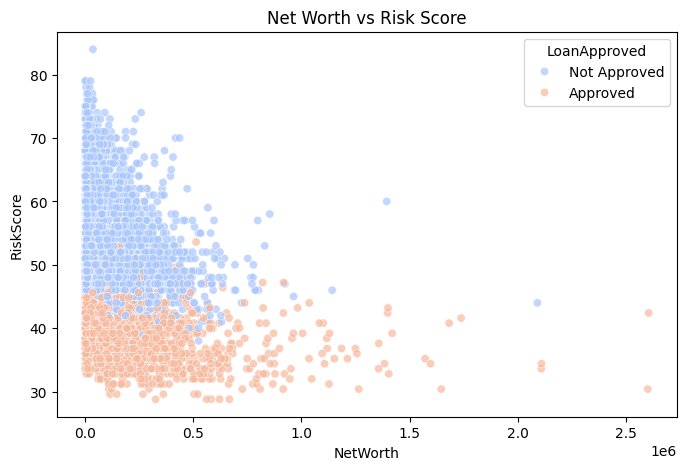

In [123]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='NetWorth', y='RiskScore', hue='LoanApproved', alpha=0.7, palette='coolwarm')
plt.title('Net Worth vs Risk Score')

19. Net Worth by Loan Approval Status

Text(0.5, 0, 'Loan Approved')

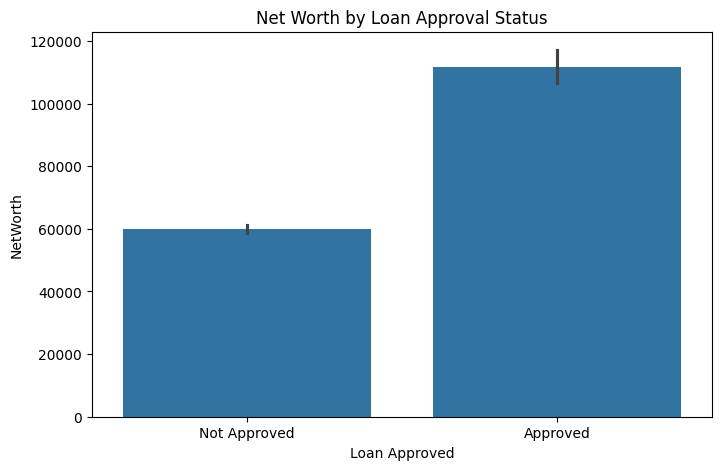

In [124]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='LoanApproved', y='NetWorth')
plt.title('Net Worth by Loan Approval Status')
plt.xlabel('Loan Approved')

20. Credit Card Utilization vs Risk Scoring

Text(0.5, 1.0, 'Credit Card Utilization Rate vs Risk Score')

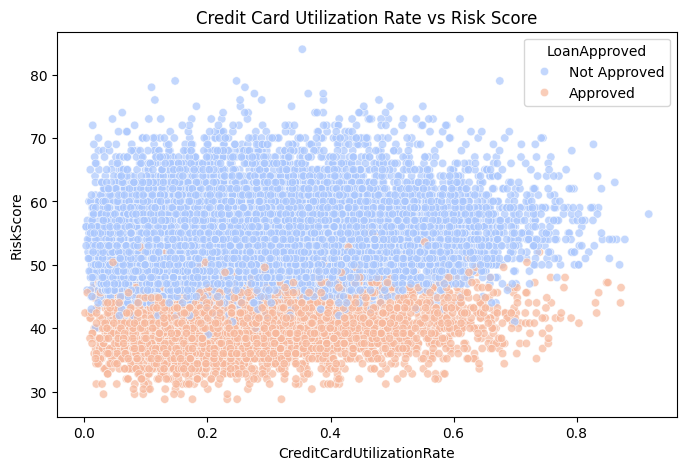

In [125]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='CreditCardUtilizationRate', y='RiskScore', hue='LoanApproved', alpha=0.7, palette='coolwarm')
plt.title('Credit Card Utilization Rate vs Risk Score')

21. Annual Income vs Total Liabilities

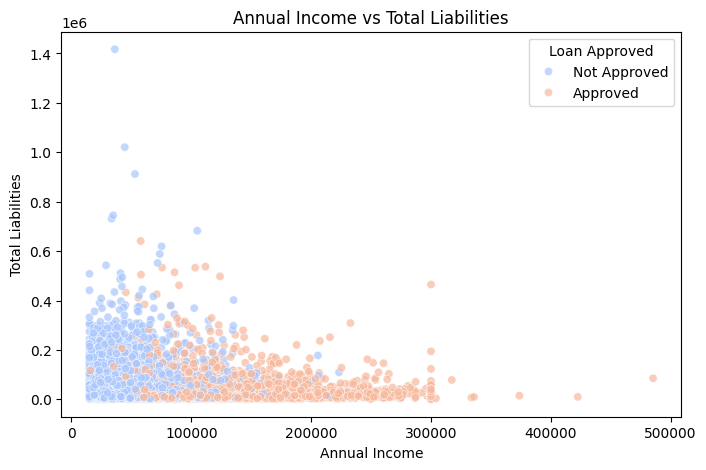

In [126]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='AnnualIncome', y='TotalLiabilities', hue='LoanApproved', alpha=0.7, palette='coolwarm')
plt.title('Annual Income vs Total Liabilities')
plt.xlabel('Annual Income')
plt.ylabel('Total Liabilities')
plt.legend(title='Loan Approved')
plt.show()

22. Debt-to-Income Ratio vs. Monthly Loan Payment

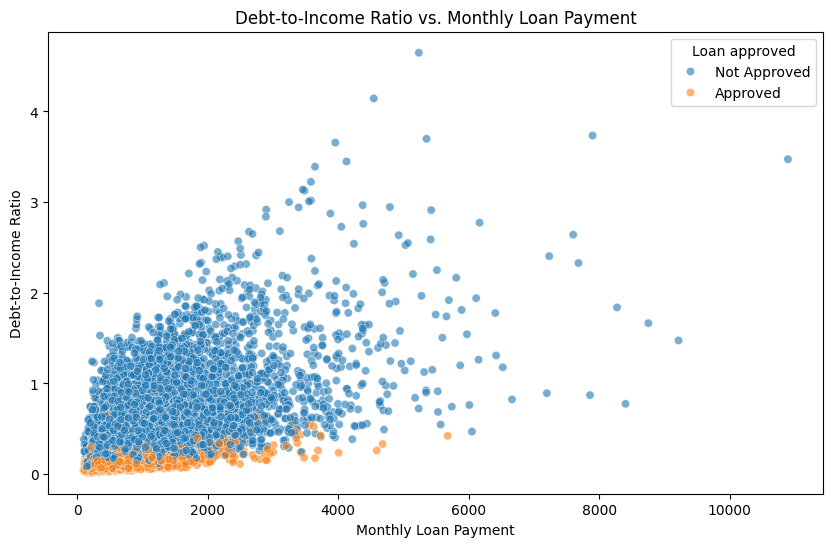

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='MonthlyLoanPayment',
    y='TotalDebtToIncomeRatio',
    hue='LoanApproved',  # Color based on Loan approved
    alpha=0.6
)

plt.title('Debt-to-Income Ratio vs. Monthly Loan Payment')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Debt-to-Income Ratio')
plt.legend(title='Loan approved')
plt.show()

23. Risk Score and Loan Approval Percentage by Bankruptcy History and Employment Status

<ipython-input-128-043cef68047c>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '49.66
(24.7%)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot.loc[i, j] = f"{risk:.2f}\n({pct:.1f}%)"
<ipython-input-128-043cef68047c>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '51.84
(28.6%)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot.loc[i, j] = f"{risk:.2f}\n({pct:.1f}%)"
<ipython-input-128-043cef68047c>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '53.23
(18.6%)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot.loc[i, j] = f"{risk:.2f}\n({pct:.1f}%)"


<Figure size 1000x600 with 0 Axes>

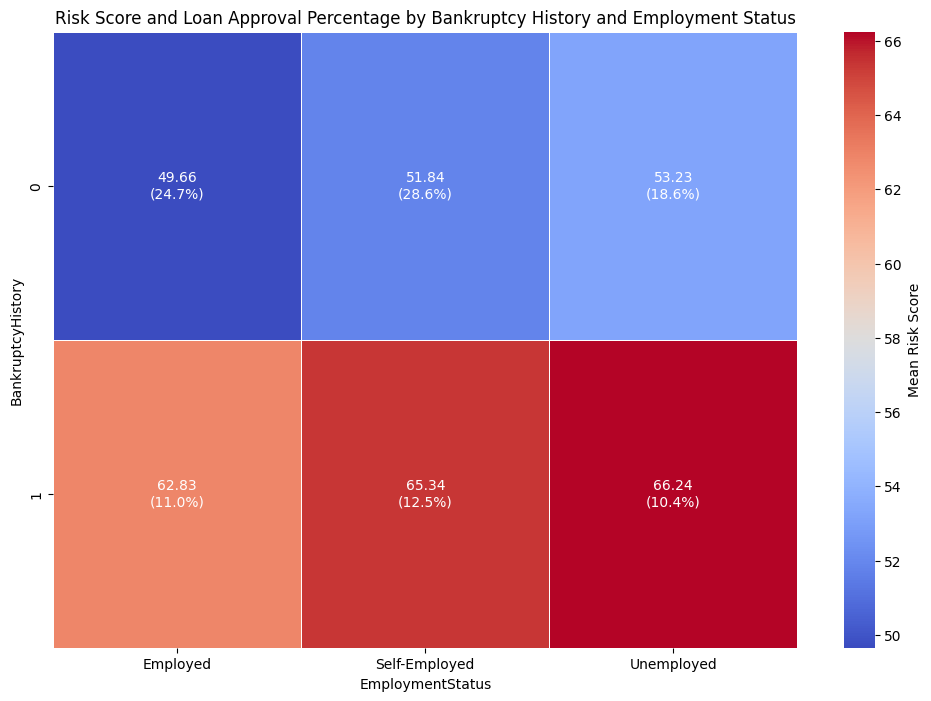

In [128]:
plt.figure(figsize=(10, 6))
# Example: Pivot for risk score mean
mean_risk_score = df.pivot_table(
    index='BankruptcyHistory',
    columns='EmploymentStatus',
    values='RiskScore',
    aggfunc='mean'
)

df1 = df
df1['LoanApproved'] = df1['LoanApproved'].map({'Approved': 1, 'Not Approved': 0})

# Calculate loan approval percentage
loan_approval_pct = df1.groupby(['BankruptcyHistory', 'EmploymentStatus'])['LoanApproved'].mean().unstack() * 100

# Combine data for annotations
annot = mean_risk_score.copy()
for i in annot.index:
    for j in annot.columns:
        risk = mean_risk_score.loc[i, j]
        pct = loan_approval_pct.loc[i, j]
        annot.loc[i, j] = f"{risk:.2f}\n({pct:.1f}%)"

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    mean_risk_score,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Mean Risk Score'}
)
plt.title('Risk Score and Loan Approval Percentage by Bankruptcy History and Employment Status')
plt.xlabel('EmploymentStatus')
plt.ylabel('BankruptcyHistory')
plt.show()